In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')

In [2]:
df=pd.read_csv('/suomi_shanghai_so2.txt',sep="\s+")

In [3]:
df

,Datetime,MJD2000,Year,DOY,sec.(UT),Orbit,CTP,Lat.,Lon.,Dist.,...,SO2_TRM,SO2_TRU,SO2_STL,Total_SO2,Slant_SO2,OMTO3_O3,Cld.F.,OMTO3_Ter_Pre,OMTO3_Ref,AI
0,20120203T044508797Z,4416.198100,2012,34,17108,1388,10,30.81,120.80,72.10,...,0.612,0.507,0.511,1.340,2.290000e+16,246.561,0.000,1005.0,0.116,-0.262
1,20120203T044516285Z,4416.198186,2012,34,17116,1388,10,31.24,120.66,73.27,...,0.448,0.372,0.375,1.697,2.749000e+16,247.801,0.000,1008.0,0.112,-0.203
2,20120203T044501308Z,4416.198013,2012,34,17101,1388,11,30.51,121.50,73.26,...,0.212,0.176,0.177,0.243,3.932000e+15,243.453,0.000,1013.0,0.105,-0.158
3,20120203T044508797Z,4416.198100,2012,34,17108,1388,11,30.95,121.37,25.25,...,-0.243,-0.205,-0.208,-0.366,-5.965000e+15,244.435,0.000,1009.0,0.104,-0.155
4,20120203T044516285Z,4416.198186,2012,34,17116,1388,11,31.38,121.23,30.52,...,-0.124,-0.106,-0.108,0.317,5.828000e+15,246.934,0.000,1011.0,0.107,-0.110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24769,20201015T051720615Z,7593.220482,2020,289,19040,46462,27,30.43,121.86,91.78,...,0.041,0.035,0.036,0.151,1.062000e+15,241.435,0.663,1013.0,0.519,-0.076
24770,20201015T051728103Z,7593.220568,2020,289,19048,46462,27,30.87,121.76,45.73,...,-0.007,-0.007,-0.008,-0.394,-2.104000e+15,235.204,0.920,1012.0,0.750,0.137
24771,20201015T051735591Z,7593.220655,2020,289,19055,46462,27,31.31,121.66,26.79,...,0.033,0.030,0.031,0.181,1.135000e+15,241.027,0.858,1012.0,0.672,0.224
24772,20201015T051743080Z,7593.220742,2020,289,19063,46462,27,31.75,121.56,65.61,...,0.037,0.037,0.040,0.367,1.226000e+15,243.917,0.897,1013.0,0.722,0.189


In [4]:
#'Datetime','Lat.','Lon.','SO2_PBL','SO2_TRL','SO2_TRM','SO2_TRU','SO2_STL','Total_SO2','Slant_SO2'
dftester=df[['Datetime','Lat.','Lon.','Total_SO2','OMTO3_O3']].copy()

In [5]:
dftester

,Datetime,Lat.,Lon.,Total_SO2,OMTO3_O3
0,20120203T044508797Z,30.81,120.80,1.340,246.561
1,20120203T044516285Z,31.24,120.66,1.697,247.801
2,20120203T044501308Z,30.51,121.50,0.243,243.453
3,20120203T044508797Z,30.95,121.37,-0.366,244.435
4,20120203T044516285Z,31.38,121.23,0.317,246.934
...,...,...,...,...,...
24769,20201015T051720615Z,30.43,121.86,0.151,241.435
24770,20201015T051728103Z,30.87,121.76,-0.394,235.204
24771,20201015T051735591Z,31.31,121.66,0.181,241.027
24772,20201015T051743080Z,31.75,121.56,0.367,243.917


In [6]:
dftester["DateforKepler"]=dftester["Datetime"].str[:4]+"/"+dftester["Datetime"].str[4:6]+"/"+dftester["Datetime"].str[6:8]+" "+dftester["Datetime"].str[9:11]+":"+dftester["Datetime"].str[11:13]+":"+dftester["Datetime"].str[13:15]+"."+dftester["Datetime"].str[15:18]

In [7]:
dftester

,Datetime,Lat.,Lon.,Total_SO2,OMTO3_O3,DateforKepler
0,20120203T044508797Z,30.81,120.80,1.340,246.561,2012/02/03 04:45:08.797
1,20120203T044516285Z,31.24,120.66,1.697,247.801,2012/02/03 04:45:16.285
2,20120203T044501308Z,30.51,121.50,0.243,243.453,2012/02/03 04:45:01.308
3,20120203T044508797Z,30.95,121.37,-0.366,244.435,2012/02/03 04:45:08.797
4,20120203T044516285Z,31.38,121.23,0.317,246.934,2012/02/03 04:45:16.285
...,...,...,...,...,...,...
24769,20201015T051720615Z,30.43,121.86,0.151,241.435,2020/10/15 05:17:20.615
24770,20201015T051728103Z,30.87,121.76,-0.394,235.204,2020/10/15 05:17:28.103
24771,20201015T051735591Z,31.31,121.66,0.181,241.027,2020/10/15 05:17:35.591
24772,20201015T051743080Z,31.75,121.56,0.367,243.917,2020/10/15 05:17:43.080


In [8]:
dftester.to_csv("/shanghai_stripped.csv",index=False)

In [9]:
dftester["Datetime"]=pd.to_datetime(dftester["Datetime"],format='%Y%m%dT%H%M%S%fZ')

In [10]:
dftester

,Datetime,Lat.,Lon.,Total_SO2,OMTO3_O3,DateforKepler
0,2012-02-03 04:45:08.797,30.81,120.80,1.340,246.561,2012/02/03 04:45:08.797
1,2012-02-03 04:45:16.285,31.24,120.66,1.697,247.801,2012/02/03 04:45:16.285
2,2012-02-03 04:45:01.308,30.51,121.50,0.243,243.453,2012/02/03 04:45:01.308
3,2012-02-03 04:45:08.797,30.95,121.37,-0.366,244.435,2012/02/03 04:45:08.797
4,2012-02-03 04:45:16.285,31.38,121.23,0.317,246.934,2012/02/03 04:45:16.285
...,...,...,...,...,...,...
24769,2020-10-15 05:17:20.615,30.43,121.86,0.151,241.435,2020/10/15 05:17:20.615
24770,2020-10-15 05:17:28.103,30.87,121.76,-0.394,235.204,2020/10/15 05:17:28.103
24771,2020-10-15 05:17:35.591,31.31,121.66,0.181,241.027,2020/10/15 05:17:35.591
24772,2020-10-15 05:17:43.080,31.75,121.56,0.367,243.917,2020/10/15 05:17:43.080


In [11]:
dftester2=dftester.drop(dftester[(dftester["Total_SO2"]==-90000) | (dftester["OMTO3_O3"]==-90000)].index).copy()

In [12]:
dftester2.set_index("Datetime",inplace=True,drop=True)

In [13]:
dftester2

,Lat.,Lon.,Total_SO2,OMTO3_O3,DateforKepler
Datetime,,,,,
2012-02-03 04:45:08.797,30.81,120.80,1.340,246.561,2012/02/03 04:45:08.797
2012-02-03 04:45:16.285,31.24,120.66,1.697,247.801,2012/02/03 04:45:16.285
2012-02-03 04:45:01.308,30.51,121.50,0.243,243.453,2012/02/03 04:45:01.308
2012-02-03 04:45:08.797,30.95,121.37,-0.366,244.435,2012/02/03 04:45:08.797
2012-02-03 04:45:16.285,31.38,121.23,0.317,246.934,2012/02/03 04:45:16.285
...,...,...,...,...,...
2020-10-15 05:17:20.615,30.43,121.86,0.151,241.435,2020/10/15 05:17:20.615
2020-10-15 05:17:28.103,30.87,121.76,-0.394,235.204,2020/10/15 05:17:28.103
2020-10-15 05:17:35.591,31.31,121.66,0.181,241.027,2020/10/15 05:17:35.591


In [14]:
tmp2=dftester2[['Total_SO2']].groupby(pd.Grouper(freq='M')).mean();

In [15]:
tmp2

,Total_SO2
Datetime,
2012-02-29,0.199756
2012-03-31,0.323533
2012-04-30,0.345423
2012-05-31,0.189715
2012-06-30,-0.014653
...,...
2020-06-30,-0.025033
2020-07-31,-0.005514
2020-08-31,0.019697


In [16]:
tmp3=dftester2[['OMTO3_O3']].groupby(pd.Grouper(freq='M')).mean();

In [17]:
tmp3

,OMTO3_O3
Datetime,
2012-02-29,271.773427
2012-03-31,281.589793
2012-04-30,314.453447
2012-05-31,309.870453
2012-06-30,304.107176
...,...
2020-06-30,281.435248
2020-07-31,283.240634
2020-08-31,275.999886


[]

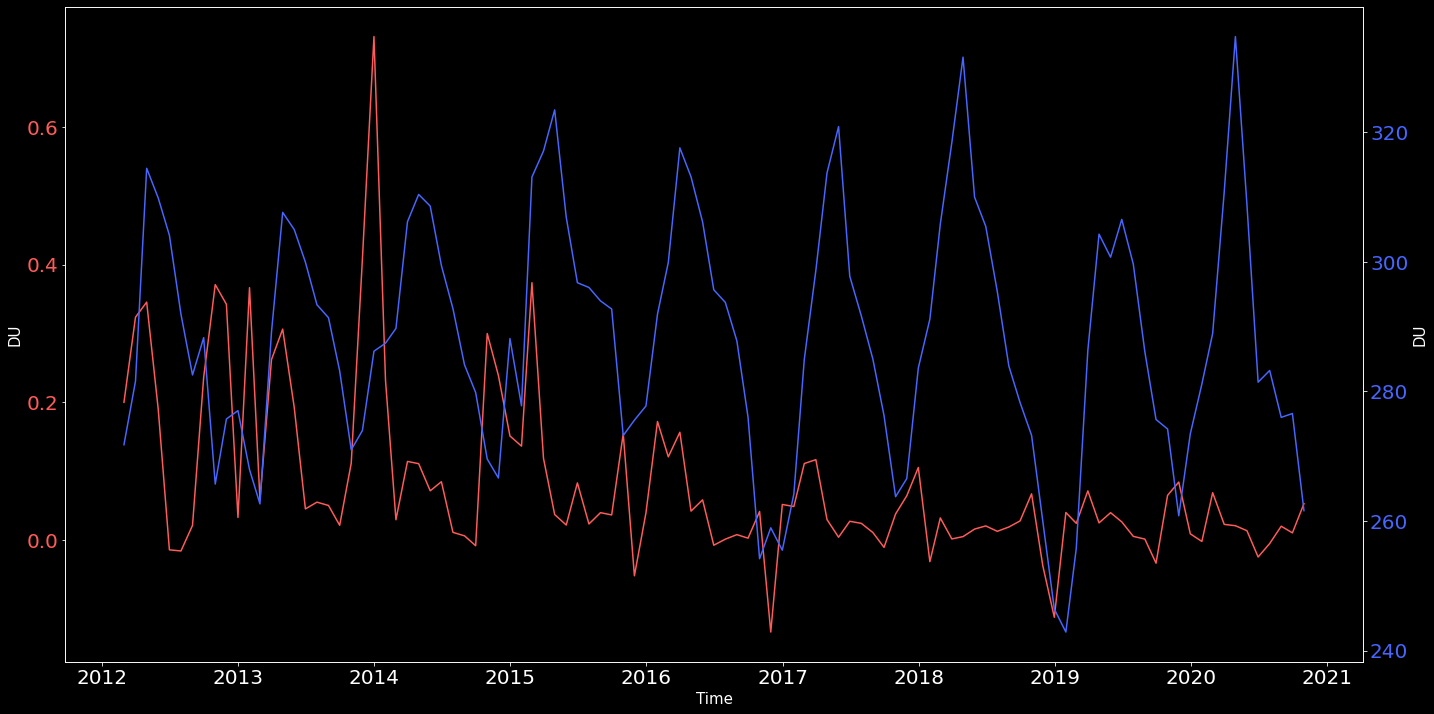

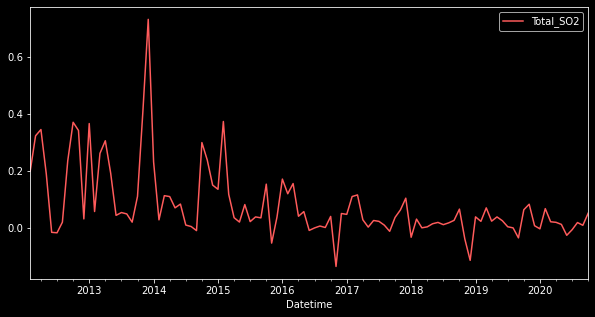

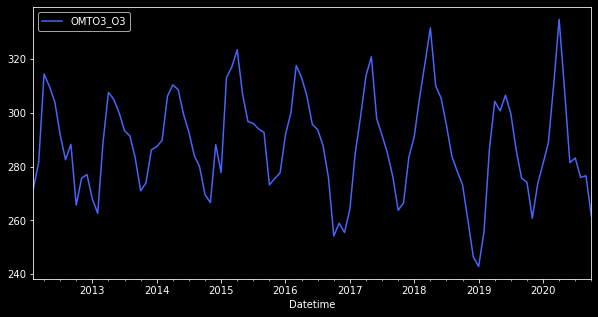

In [18]:
fig, ax1 = plt.subplots(figsize=(20,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
colors = '#ff5b5b'
ax1.set_xlabel('Time',fontsize=15)
ax1.set_ylabel('DU',fontsize=15)
ax1.plot(tmp2, color=colors)
ax1.tick_params(axis='y', labelcolor=colors)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

coloro = '#4666FF'
plt.yticks(fontsize=20)
ax2.set_ylabel('DU',fontsize=15)  # we already handled the x-label with ax1
ax2.plot(tmp3, color=coloro)
ax2.tick_params(axis='y', labelcolor=coloro)

fig.tight_layout(pad=1)  # otherwise the right y-label is slightly clipped
tmp2.plot(color=colors,figsize=(10,5))
tmp3.plot(color=coloro,figsize=(10,5))

plt.plot()
